In [3]:
# --- Librerías ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, interactive, Layout

In [4]:
# --- Cargar archivo CSV ---
RUTA = '/workspaces/ml-bootcamp-labs/data/raw/Shift_Pozos_LDiscEoc-cvs.csv'
df = pd.read_csv(RUTA, sep=';')

In [5]:
# Ver columnas y primeras filas
print(df.head())

   Well ID        UWI Common Well Name            X            Y  \
0      158   BERL0001           BERL-1  1020207.798  1278820.347   
1      350   BERL0002           BERL-2  1022863.313  1279619.735   
2       19   CARD0001           CARD-1  1023881.317  1277912.935   
3      361   CARD0012          CARD-12  1023417.419  1278154.843   
4       39  CARD0001N          CARD-1N  1022533.697  1278615.780   

         Pick Name       Pick Z  Nearest Node Z  Surface Intersection Z  \
0  CCUS_01_DISC_TK  6958.999932       6977.0117               6966.7560   
1  CCUS_01_DISC_TK  7089.999829       7086.4653               7107.1720   
2  CCUS_01_DISC_TK  7909.999856       7841.2886               7842.2017   
3  CCUS_01_DISC_TK  7915.452128       7846.3100               7847.7830   
4  CCUS_01_DISC_TK  7872.611423       7932.9520               7937.7935   

       Delta  Delta Reverse  Absolute Delta Interpreter Id  Observation #  
0   7.755928      -7.755928        7.755928           LMRC      

In [6]:
# Mostrar nombres de columnas para confirmar
print("Columnas disponibles:", df.columns.tolist())

Columnas disponibles: ['Well ID', 'UWI', 'Common Well Name', 'X', 'Y', 'Pick Name', 'Pick Z', 'Nearest Node Z', 'Surface Intersection Z', 'Delta', 'Delta Reverse', 'Absolute Delta', 'Interpreter Id', 'Observation #']


In [7]:
# 2. Selección de columnas clave
# ============================
# Ajusta aquí si los nombres cambian (usa exactamente los que aparecen en tu archivo)
col_delta = "Delta"
col_abs_delta = "Absolute Delta"
col_x = "X"
col_y = "Y"
col_pickz = "Pick Z"

In [8]:
# ============================
# 3. Estadísticos descriptivos
# ============================
stats = df[[col_delta, col_abs_delta]].describe(percentiles=[0.25,0.5,0.75])
print(stats)

            Delta  Absolute Delta
count  122.000000      122.000000
mean     6.749800      107.317493
std    146.858049      100.004982
min   -328.943573        0.222498
25%    -72.535013       38.830160
50%      6.945914       84.255073
75%     84.604193      158.878192
max    791.108127      791.108127


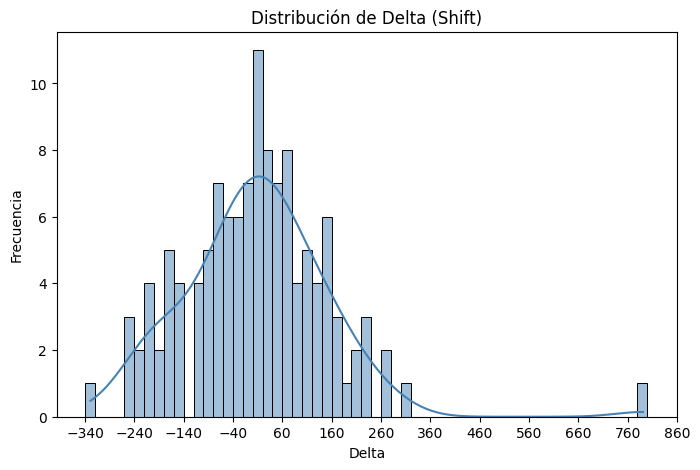

In [11]:
# Definir tamaño de bin y tamaño de tick
bin_size = 20
tick_size = 100

# Redondear mínimo y máximo a múltiplos de bin_size o tick_size
min_delta = bin_size * np.floor(df[col_delta].min() / bin_size)
max_delta = bin_size * np.ceil(df[col_delta].max() / bin_size)

# Crear bins
bins = np.arange(min_delta, max_delta + bin_size, bin_size)

# Crear ticks (cada tick_size)
ticks = np.arange(min_delta, max_delta + tick_size, tick_size)

# Graficar
plt.figure(figsize=(8,5))
sns.histplot(df[col_delta], bins=bins, kde=True, color='steelblue')
plt.xticks(ticks)
plt.title("Distribución de Delta (Shift)")
plt.xlabel("Delta")
plt.ylabel("Frecuencia")
plt.show()

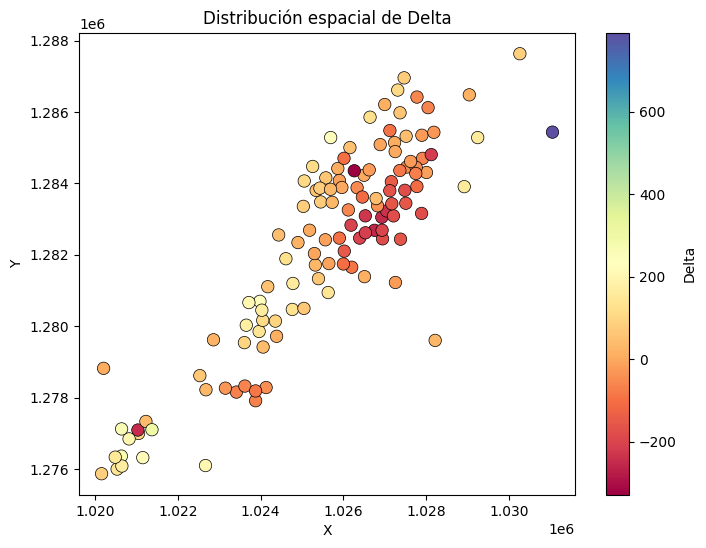

In [13]:
# 5. Mapa espacial
# ============================
plt.figure(figsize=(8,6))

# Elegir un cmap con contraste y ajustar rango de colores
vmin = df[col_delta].min()  # mínimo para escala de colores
vmax = df[col_delta].max()  # máximo para escala de colores

sc = plt.scatter(
    df[col_x],
    df[col_y],
    c=df[col_delta],
    cmap='Spectral',  # colormap más colorido y contrastado
    s=80,             # tamaño de los puntos
    edgecolor='k',
    linewidth=0.5,
    vmin=vmin,
    vmax=vmax
)

plt.colorbar(sc, label='Delta')
plt.title("Distribución espacial de Delta")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

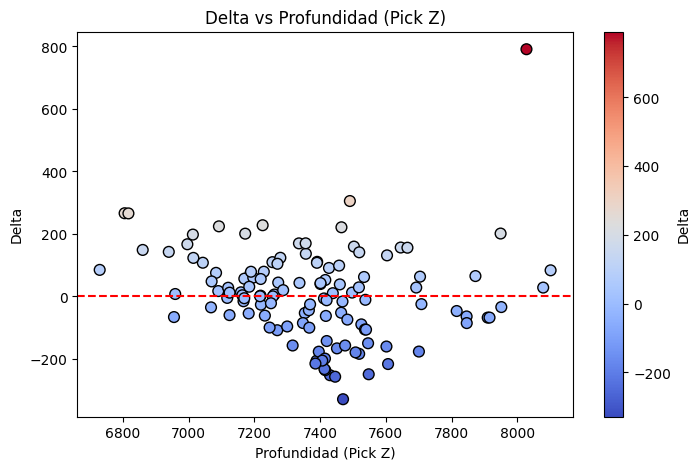

In [17]:
# 7. Correlación con profundidad
# ============================
plt.figure(figsize=(8,5))

sc = plt.scatter(
    df[col_pickz],
    df[col_delta],
    c=df[col_delta],        # color según Delta
    cmap="coolwarm",
    s=60,
    edgecolor="k"
)

plt.title("Delta vs Profundidad (Pick Z)")
plt.xlabel("Profundidad (Pick Z)")
plt.ylabel("Delta")
plt.axhline(0, color="red", linestyle="--")

# Colorbar
plt.colorbar(sc, label="Delta")

plt.show()



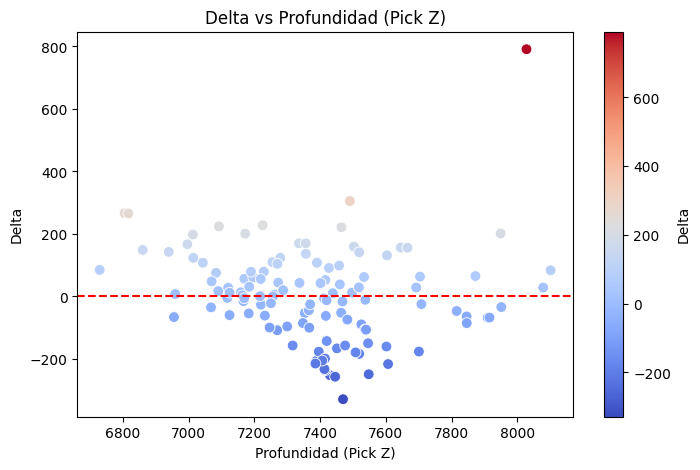

In [18]:
plt.figure(figsize=(8,5))
ax = sns.scatterplot(
    x=df[col_pickz],
    y=df[col_delta],
    hue=df[col_delta],
    palette='coolwarm',
    legend=False,
    s=60
)

norm = plt.Normalize(df[col_delta].min(), df[col_delta].max())
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
sm.set_array(df[col_delta])
plt.colorbar(sm, ax=ax, label="Delta")  # <--- importante pasar ax=ax

plt.title("Delta vs Profundidad (Pick Z)")
plt.xlabel("Profundidad (Pick Z)")
plt.ylabel("Delta")
plt.axhline(0, color="red", linestyle="--")
plt.show()
